## 参考資料
http://www.turbare.net/transl/scipy-lecture-notes/index.html

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline


# Jupyter 設定
* QtConsoleの初期ファイルの作成方法<br>
  $ jupyter qtconsole --generate-config<br>
  生成先：~/.jupyter/jupyter_qtconsole_config.py<br>

* Notebookの初期化ファイルの作成方法<br>
  $ jupyter notebook --generate-config<br>
  生成先：~/.jupyter/jupyter_notebook_config.py<br>

# Markdownの例

[参考1](http://qiita.com/Thermidor/items/b684cfabe0f2fde0c67b)<br>
[参考2](http://qiita.com/tbpgr/items/989c6badefff69377da7)

---

# hedding
## hedding
### hedding
abcd
----
### abcd ###
abcd

abcd **bold** hijk *italic* opqr

* hoge
  * hoge
    * hogege

> inyo
> inyo
> inyo

inline program ` printf("hello-world")` hoge hoge

| Left | Center | Right | 
|:---|:---:|---:|
| 111 | 222 | 333 |
| e | f | g |

```python
def f(x):
    """a docstring"""
    return x**2
```

abcd

---
    
$$
\begin{align}
\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}
\end{align}
$$

$$
\begin{eqnarray}
\newcommand{\pdfrac}[2]{\frac{\partial #1}{\partial #2}}
\mathbf{W} & \gets & \mathbf{W} - \eta \pdfrac{L}{\mathbf{W}}
\end{eqnarray}
$$
### 参考URL
http://www.latex-cmd.com/ <br>
http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html

# 関数の引数は値渡し？参照渡し？

[参考](http://rcmdnk.github.io/blog/2015/07/08/computer-python/)<br>
[参考２](http://qiita.com/urakarin/items/1d6e0e76bffb9297606e)

Pythonでは関数に値を渡す時にその**参照**が渡されます。

ですが、渡された関数内で変更されるとき、 渡した値自体が変更されるかどうかは 渡されたオブジェクトのタイプによります。

オブジェクトのタイプは**Immutable**(変更不可)と**Mutable**(変更可能)に分けられます。

Immutable: int, float, str, tuple 等
Mutable: list, set, dict 等
このうち、Mutableな値が関数に渡された場合、 中で変更すると値の変更が外にも反映されますが、 Immutableなものに関しては変更されません。

ただ、これもちょっと注意する必要があって、 listでもlist内の項目を変更したり値を追加したりするのではなく、 新たなlist自体を与える様な事をする場合は外では書き換えられません。

In [30]:
def fn(x=[1,2,3]):
    print 'fn: ', x, id(x)
    return x

x = fn()
print 'Default value', x, id(x)

x[0] = 4

y = fn()
print 'Not Default value', y, id(y)


fn:  [1, 2, 3] 162506440
Default value [1, 2, 3] 162506440
fn:  [4, 2, 3] 162506440
Not Default value [4, 2, 3] 162506440


##  インスタンス変数もMutable/Imutableの注意が必要

In [1]:
class Hoge():
    def __init__(self,val):
        self.val = val
    def print_val(self):
        print id(self.val), self.val
    def inc(self):
        self.val += 1

print "インスタンス変数は引数と同じIDになる"
aa = 10;
hoge = Hoge(aa)
print id(aa), aa
hoge.print_val()

print "インスタンス変数が変更されると別IDになる"
hoge.inc()
print id(aa), aa
hoge.print_val()

print "でも、mutableな変数は別IDにはならず、呼び出し側も値が変わる"
bb = np.array([1,2])
print id(bb), bb
fuga = Hoge(bb)
fuga.inc()
print id(bb), bb
fuga.print_val()

インスタンス変数は引数と同じIDになる
6578768 10
6578768 10
インスタンス変数が変更されると別IDになる
6578768 10
6578744 11
でも、mutableな変数は別IDにはならず、呼び出し側も値が変わる
162430608 [1 2]
162430608 [2 3]
162430608 [2 3]


### 配列をコピーする場合はcopyメソッドを使わないと同一インスタンスのままになる
配列はMutableだから

In [28]:
aa = 0
aanp = 0
copynp = 0

def reset_aa():
    global aa,aanp,copynp
    aa = [[1,2],[3,4]]
    aanp = np.array(aa)
    copynp = aanp.copy()
    
reset_aa()
print "numpy array\n",aanp
bbnp = aanp
bbnp[0] = 0;
print "updated as array\n",aanp

reset_aa()
print "list\n", aa
bb = aa
bb[0] = 0;
print "updated as list \n", aa

reset_aa()
copynp = np.ones_like( copynp );
print "update copy of array\n", copynp
print "original array\n", aanp


numpy array
[[1 2]
 [3 4]]
updated as array
[[0 0]
 [3 4]]
list
[[1, 2], [3, 4]]
updated as list 
[0, [3, 4]]
update copy of array
[[1 1]
 [1 1]]
original array
[[1 2]
 [3 4]]


# アンパック

# プロットのサンプル
参考ページ<br>
http://seesaawiki.jp/met-python/d/matplotlib

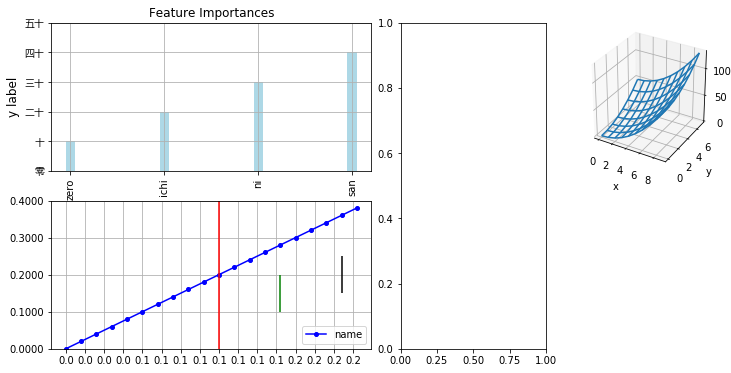

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
import matplotlib.font_manager # 日本語
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

prop = matplotlib.font_manager.FontProperties(fname="C:/WIndows/Fonts/meiryo.ttc")
fig = plt.figure(figsize=[12,6])
G = gridspec.GridSpec(2,4)

### Figure 1
width=0.1
ax = plt.subplot(G[0,:2])
plt.grid(True)
plt.xlabel('x label', fontsize=12 )
plt.ylabel('y label', fontsize='large')
plt.title('Feature Importances')
plt.bar([0,1,2,3], [10,20,30,40], width=width, color='lightblue', align='center')
plt.xticks([0,1,2,3], ['zero','ichi','ni','san'], rotation=90)
# ax はticks と label を分けて設定しないといけない
ax.set_yticks( range(0,51,10) )
ax.set_yticklabels( [ u'零', u'十', u'二十',  u'三十',  u'四十', u'五十' ] ,fontproperties=prop)
#plt.xlim([-1, 4])
#plt.tight_layout()

### Figure 2
plt.subplot(G[1,:2])
plt.plot( np.arange(0, 0.2, 0.01), np.arange( 0, 0.4, 0.02), 'bo-', 
         markersize=4, label='name' )
plt.grid()
plt.ylim([0.0, 0.4])
plt.legend(loc='lower right')
# tick step
plt.xticks( np.arange(0, 0.2, 0.0125))
# virtical lines
plt.axvline( 0.1, color='r')
plt.vlines( [0.14,0.18], [0.1,0.15], [0.2, 0.25], colors=['g','k']) # ( x, ymin, ymax, ... )
ax = plt.gca()
# precision
ax.xaxis.set_major_formatter( FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter( FormatStrFormatter('%0.4f'))

### Figure 3
plt.subplot(G[:,2])

### Figure 4
ax = plt.subplot(G[0,3],projection='3d')
x = range(10)
y = range(8)
X,Y = np.meshgrid( x, y )
ax.plot_wireframe( X,Y, X**2 + Y**2 )
plt.xticks( x[::2] )
plt.xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### After the plot
plt.savefig('plot_sample.png', dpi=300)
plt.show()

# Pandasのサンプル
参考<br>
http://sinhrks.hatenablog.com/entry/2014/11/12/233216

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'C1': [11, 21, 31],
                   'C2': [12, 22, 32],
                   'C3': [13, 23, 33],
                   'C4': [14, 24, 34]})
print df
print df [[True, False, True]]
ary = df.values.astype(np.int32)
idx = df.index.values.astype(np.int32)
print ary.dtype
print idx.dtype
print ary
print idx
print df.ix[:1,:1]  # including index=1 (loc behavior), NOT including column=1(iloc behavior)
print df.iloc[:1,:1] # use iloc for location index

   C1  C2  C3  C4
0  11  12  13  14
1  21  22  23  24
2  31  32  33  34
   C1  C2  C3  C4
0  11  12  13  14
2  31  32  33  34
int32
int32
[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]
[0 1 2]
   C1
0  11
1  21
   C1
0  11


## ボタン等のつけ方
[参考](http://myenigma.hatenablog.com/entry/2015/08/30/223559)

# Waveファイルの扱い
[参考1](http://yukara-13.hatenablog.com/entry/2013/11/09/103848)<br>
[参考2](http://qiita.com/yu_tailsfox/items/86380a0d4d016e1634f1)<br>
[参考3](https://docs.scipy.org/doc/scipy-0.18.1/reference/io.html)

In [11]:
# -*- coding: utf-8 -*-
#from scipy.io.wavfile import read as siw
import scipy.io.wavfile as siw

#wavfile = "./test.wav"
wavfile = "../pydub/test/data/test1.wav"

fs, data = siw.read(wavfile)

print "Sampling rate :", fs

if (data.shape[1] == 2):
    left = data[:, 0]
    right = data[:, 1]

siw.write( "test_out.wav",  fs, data )

Sampling rate : 32000


# 連立方程式を解く
[参考１](http://myenigma.hatenablog.com/entry/2015/11/21/222755#連立方程式を解く)

# 改行なしで文字列を出力したい
[参考](http://www.lifewithpython.com/2013/12/python-print-without-.html)<br>
ひとつめは print string, を使う方法です。


In [12]:
print "hello",
print "hello",
print "hello"

hello hello hello


もうひとつは sys.stdout.write() を使う方法です。

In [13]:
import sys
sys.stdout.write("hello")
sys.stdout.write("hello")
sys.stdout.write("hello")

hellohellohello

Python3で改行を入れてほしくない場合は次のようにするとよいようです。

In [16]:
# case in Python 3
print("hello", end="")
print("hello", end="")

hellohello

ちなみに、Python2.6以降であれば、次の一文を宣言すると、 print 文を上書きする形でPython3の print 関数を使うことができるようになります。

In [15]:
## case in Python 2.6~
# from __future__ import print_function
# print("hello", end="")
# print("hello", end="")

hellohello

# global変数
関数の中でグローバル変数は参照できるが、そのままでは変更できない。
global 変数名 でグローバル宣言すると変更できる。
宣言せずに代入すると別インスタンスが生成される模様。


# Numpy関係

## 配列の基本

In [5]:
aa = [[1,2],[3,4]]
aanp = np.array(aa)
print ( aa[1], aanp[1] )
print ( aa[1][1], aanp[1][1] )
print ( type(aa[1][1]), type(aanp[1][1]) )


[3, 4] [3 4]
4 4
<class 'int'> <class 'numpy.int32'>


In [6]:
print ( aa[[0]] )

TypeError: list indices must be integers or slices, not list

In [8]:
print ( aanp[[0]] )
print ( aanp[[0,1]] )
print ( aanp[[0,1,1,0]][2] )

[[1 2]]
[[1 2]
 [3 4]]
[3 4]


In [9]:
print ( aanp[[True,True]] )

[[1 2]
 [3 4]]


In [5]:
print ( aanp[np.array([True,True])] )

[[1 2]
 [3 4]]


In [10]:
print ( aanp[np.array([True,True])][0] )

[1 2]


In [16]:
print ( aanp == 1 )
print ( aanp[aanp==1])

[[ True False]
 [False False]]
[1]


In [15]:
print ( aanp[0,0] )
print ( aanp[0][0] )
print ( aanp[0][0:1] )
print ( aanp[0:1][0:1] )
print ( type(aanp[aanp==1]) )

[1]
1
1
[1]
[[1 2]]
<class 'numpy.ndarray'>


In [9]:
print (aanp[aanp==1]).shape
print aanp[0][0].shape
print aa[0][0].shape

(1,)
()


AttributeError: 'int' object has no attribute 'shape'

In [13]:
bbnp =np.arange(0.0,0.9,0.1).reshape(3,3)
print (bbnp)
bbnp[ (bbnp>0.3) & (bbnp<0.8) ] = -1.0  # ()括弧を忘れずに
print (bbnp)

[[ 0.   0.1  0.2]
 [ 0.3  0.4  0.5]
 [ 0.6  0.7  0.8]]
[[ 0.   0.1  0.2]
 [-1.  -1.  -1. ]
 [-1.  -1.   0.8]]


###  配列の諸元・比較

In [26]:
print ( aanp.size )
print ( aanp.ndim )
print ( aanp.shape )

4
2
(2, 2)


In [23]:
print ( aanp == aanp )
print ( np.array_equal( aanp, aanp ) )
print ( np.allclose( aanp, aanp+1, atol=1.1 ) )

[[ True  True]
 [ True  True]]
True
True


## 要素数が１の部分行列を生成すると次元数が減る対策

In [24]:
a = np.array( range(24)).reshape(2,3,4)
print( a.shape, 'original matrix')
z = np.zeros_like( a[:,1,:])
print( z.shape, 'sub matrix?')
z = np.zeros_like( a[:,1:2,:])
print( z.shape, 'ok')


(2, 3, 4) original matrix
(2, 4) sub matrix?
(2, 1, 4) ok


## ゼロ行列の追加（ゼロパディング）

In [3]:
a = np.array( range(24)).reshape(2,3,4)
z = np.zeros_like( a[:,:,1:2])
acat = np.concatenate( (a, z), axis=2 )
print( a.shape, z.shape, acat.shape )
# もっと簡単に
acat2 = np.pad( a, ((0,0),(0,0),(0,1)), 'constant')
print( acat2.shape )
print( np.array_equal( acat,acat2 ) )
print( np.allclose( acat,acat2 ) )




(2, 3, 4) (2, 3, 1) (2, 3, 5)
(2, 3, 5)
True
True


# 便利そうな関数

## numpy.bincount()
配列に含まれている０と１の数を数えるのに便利

In [9]:
a = [0, 1, 0, 1, 1, 0, 0]
np.bincount(a)

array([4, 3])

In [1]:
a = [0,5]
np.bincount(a)

array([1, 0, 0, 0, 0, 1])

## numpy.argmax()

In [13]:
np.argmax( [1,2,10,3,4])

2

## テーブルルックアップ

In [17]:
table = np.array([5,4,3,2,1,0])
indata = np.array([[0,1,2],[3,4,5]])
table[indata]


array([[5, 4, 3],
       [2, 1, 0]])

## ravelと flattenの違い
ravel は変換前の行列も変更される('F'を指定した場合を除く?)のに対し、flattenは変換前の行列は影響を受けない。
Webでは次の表現が多数。「flattenは必ずコピーを返しますが、revelは必要なときだけコピーを返します(ですから特に大きな配列の場合後者がとても速いです)。」

In [15]:
aa = np.array( [[1,2],[3,4]])
print "befor ravel\n",aa
b0=aa.ravel(); bc=aa.ravel('C'); bf=aa.ravel('F')
b0[0] = 10;    bc[1] = 20;       bf[2] = 30
print "after ravel\n",aa
print b0, bc, bf

befor ravel
[[1 2]
 [3 4]]
after ravel
[[10 20]
 [ 3  4]]
[10 20  3  4] [10 20  3  4] [ 1  3 30  4]


In [6]:
aa = np.array( [[1,2],[3,4]])
b0=aa.flatten(); bc=aa.flatten('C'); bf=aa.flatten('F')
b0[0] = 10;    bc[1] = 20;       bf[2] = 30
print aa
print bf

[[1 2]
 [3 4]]
[ 1  3 30  4]


# Numpy配列のbroadcasting(次元の拡張)
Numpy が配列全てを変換して同じサイズを持つようにできる場合に行われる変換を broadcasting と呼びます。

In [12]:
x = np.arange(5)
y = np.arange(5)[:,np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

# reshape の -1

配列の総要素数が不明の場合は，大きさが不明な次元で -1 を指定すると適切な値が自動的に設定されます．

In [13]:
np.arange(6).reshape((2, -1))

array([[0, 1, 2],
       [3, 4, 5]])

In [14]:
np.arange(5).reshape((-1,1))

array([[0],
       [1],
       [2],
       [3],
       [4]])

# バイナリファイルを一次元配列として全部読み込む

In [15]:
with open( 'foo.csv', 'rb') as fp:
    data = np.fromfile( fp, dtype=np.int32 )
data

array([221391921, 875311882])

## csv ファイルの読み書き

In [16]:
data = np.genfromtxt( "foo.csv", dtype=int, delimiter="," ) # loadtxtも可だが、欠落データをnanで埋めてくれる機能はない
print data.dtype
np.savetxt("bar.csv", data, delimiter=",", fmt="%d")

int32


## Numba でお気楽高速化

In [18]:
from numba import jit

def hoge(xx):
    wa = 0
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wa = wa + xx[i,j]
    return wa

@jit
def hoge2(xx):
    wa = 0
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wa = wa + xx[i,j]
    return wa

xx = np.random.rand(100,100)
%timeit hoge(xx)
xx = np.random.rand(100,100)
%timeit hoge2(xx)

xx = np.random.rand(100,100)
%timeit hoge(xx)
xx = np.random.rand(100,100)
%timeit hoge2(xx)

100 loops, best of 3: 5.12 ms per loop
The slowest run took 6625.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.6 µs per loop
100 loops, best of 3: 5.04 ms per loop
100000 loops, best of 3: 12.6 µs per loop


In [19]:
%timeit np.sum(xx)

The slowest run took 4.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.4 µs per loop


## 行列のスプリット
array_split は割り切れない場合は適当に配分してくれるが、split はエラーになる

In [18]:
a = np.array(range(10))
# splits tekito-ni
aa = np.array_split( a, 3 )
print type(aa)
print type(aa[0])
print aa
# causes error
np.split(a,3)

<type 'list'>
<type 'numpy.ndarray'>
[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]


ValueError: array split does not result in an equal division

## 次元の追加、削減

In [54]:
>>> x = np.array([[[0], [1], [2]]])
>>> x.shape
(1, 3, 1)
>>> xsqz = np.squeeze(x)
xsqz.shape
(3,)
>>> np.squeeze(x, axis=(2,)).shape
(1, 3)

(1, 3)

In [53]:
xsqz_ax1 = xsqz.reshape( [-1,xsqz.size,1] )
print xsqz_ax1.shape
xsqz_ax2 = xsqz_ax1[:,:,:,np.newaxis]
print xsqz_ax2.shape

(1, 3, 1)
(1, 3, 1, 1)


## sum で加算する方向( axis )について
加算されて１に縮退される軸を指定する


In [29]:
aa = np.array( [[1,2,3],[4,5,6]])
print "shape input", aa.shape
aa0 = np.sum( aa, axis=0 )
aa1 = np.sum( aa, axis=1 )
print "shape sum wrt axis=0", aa0.shape
print "shape sum wrt axis=1", aa1.shape

shape input (2, 3)
shape sum wrt axis=0 (3,)
shape sum wrt axis=1 (2,)


## 可変引数
* *一つがリストの可変引数。受け取った引数は指定した順序でタプルに格納されます
* *二つがキーワード可変長引数。受け取った引数はキーワードと値の対を要素とする辞書になる（順序は保存されない）

In [3]:
def fn ( *arg ):
    print (arg)
    
fn( 1,2,'dog')
fn( *(1,2,'dog'))
fn( (1,2,'dog') )


(1, 2, 'dog')
(1, 2, 'dog')
((1, 2, 'dog'),)


In [9]:
def fn( **arg):
    print arg

fn( a=1, b=2, c=2)
fn( **{'a':1,'b':2, 'c':3} )

{'a': 1, 'c': 2, 'b': 2}
{'a': 1, 'c': 3, 'b': 2}


## 漬物(Pickle)

In [26]:
import pickle
class uum():
    def __init__(self,val):
        self.val = val
    def print_val(self):
        print self.val
  
hoge = [uum(10), uum(20) ]
with open('sample.pickle', mode='wb') as f:
    pickle.dump( hoge, f)
with open('sample.pickle', mode='rb') as f:
    fuga = pickle.load(f)
    
print hoge
print fuga
fuga[1].print_val()

[<__main__.uum instance at 0x0000000009CEC188>, <__main__.uum instance at 0x0000000009CEC108>]
[<__main__.uum instance at 0x0000000009CEC408>, <__main__.uum instance at 0x0000000009CEC148>]
20


## あるオブジェクトが特定のクラスのインスタンスかチェックしたい

In [ ]:
## s = "hello"
print type(s) == str 
print isinstance( s, str )

## デバッグ Debug でばっぐ

In [1]:
%pdb 

Automatic pdb calling has been turned ON


In [3]:
x=1
y=0
x/y

ZeroDivisionError: integer division or modulo by zero

> <ipython-input-3-a81a2919fa7c>(3)<module>()
      1 x=1
      2 y=0
----> 3 x/y

ipdb> y
0
ipdb> quit


### または、break したいコードの直上に以下の一行を張り付ける

In [ ]:
from IPython.core.debugger import Pdb; Pdb().set_trace() #  break したい所にこの行を張り付ける

## リスト内包と条件文

In [7]:
x = range(10)
print( [i for i in x if i>5] )
print( [i if i > 5 else 0 for i in x ] )
# print( [i if i > 5 for i in x ] ) # Error


[6, 7, 8, 9]
[0, 0, 0, 0, 0, 0, 6, 7, 8, 9]
